In [93]:
import pandas as pd

### Read dataset

In [148]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/Social_Network_Ads.csv")
# Get dummies values for categorical variables 
df=pd.get_dummies(df)
# Drop variables that are not used 
df=df.drop(["User ID","Gender_Female", "EstimatedSalary_K"],axis=1)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [149]:
# Get descriptive statistics 
df.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [150]:
# Count number of purchased and unpurchased
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

##### Feature preparation and preprocessing

In [151]:
X=df.iloc[:, 0:len(df)]
y=df["Purchased"]

In [152]:
# Standardize the X features because there are huge differences between values such as Age and Slary
from sklearn.preprocessing import StandardScaler

featureTransform=StandardScaler()
X=featureTransform.fit_transform(X)

##### Data splitting

In [166]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=12)

In [167]:
# Calculate the number of maximum K
y_train.shape[0]**0.5/2

8.366600265340756

###### Model building

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
# Loop and choose best K

k=[]
testAccuracy=[]
trainAccuracy=[]

for i in range(2,8):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_training=model.predict(X_train)
    scoreTest=accuracy_score(y_test,y_pred)*100
    scoreTrain=accuracy_score(y_train,y_training)*100
    k.append(i)
    testAccuracy.append(scoreTest)
    trainAccuracy.append(scoreTrain)

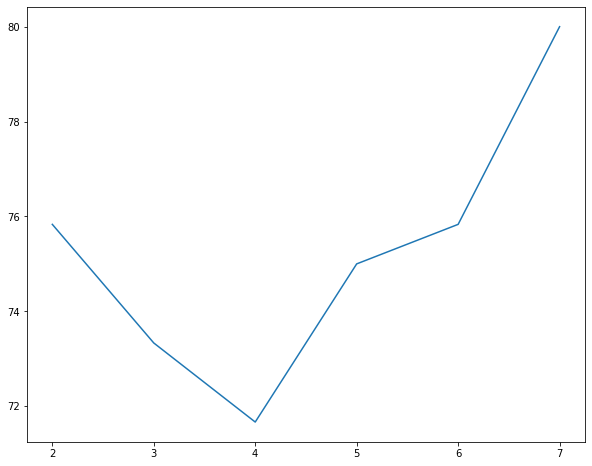

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k, testAccuracy)
plt.show()

## Select best features to train the model

##### SelectKBest

In [161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [162]:
X=df.iloc[:, 0:len(df)]
y=df["Purchased"]
bestFeat=SelectKBest(score_func=chi2, k="all")
bestFeat.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x000001E800C02040>)

In [170]:
df_score=pd.DataFrame({"Feature":X.columns, "Score":bestFeat.scores_})
df_score.nlargest(4, "Score")

,Feature,Score
1,EstimatedSalary,872013.169231
0,Age,451.155226
2,Purchased,257.000000
3,Gender_Male,0.367946


##### Correlation Table

<AxesSubplot:>

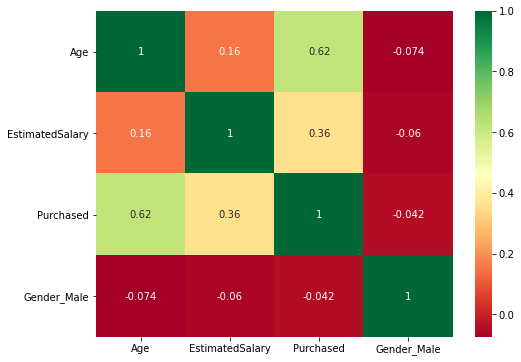

In [177]:
cor=df.corr()
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap="RdYlGn")

We can run the model with two features: Salary and Age 